# Prophet

Apziva project #5<br>
2023 09 04

__Summary:__
* This notebook showcases the use of Prophet to forecast a time series.
* There are a few installation problems. Main point: Prophet is now installed as `pip install prophet` rather than `pip install fbprophet` (or even `pip install metaprophet`).
* Power of forecasting:
    * Prophet easily forecasts seasonal car sales (demo data from the 1960's).
    * Prophet has, however, a hard time to forecast Microsoft stock market prices.

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [Installation](#Installation)
* [Introduction](#Introduction)
* [Car dataset](#CarDataset)
    * [Plot the data](#CarDatasetPlotData)
    * [Fit Prophet model](#CarDatasetFitProphetModel)  
    * [In-sample forecast](#CarDatasetInSampleForecast)    
    * [Out-of-sample forecast](#CarDatasetOutOfSampleForecast)   
    * [Metric](#CarDatasetMetric)   
* [Microsoft dataset](#MicrosoftDataset)    
    * [Parametrized Prophet function](#CarDatasetParametrizedProphetFunction)       

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## Installation <a class="anchor" id="Installation"></a>
[TOC](#TOC)

In [2]:
import sys
print(sys.version)

3.9.10 | packaged by conda-forge | (main, Jan 30 2022, 18:02:33) [MSC v.1929 64 bit (AMD64)]


__Trials__
1. `libpython`  `pystan` `fbprophet`
    * __Commands__
        * conda install libpython m2w64-toolchain -c msys2
        * pip install pystan
        * pip install fbprophet
    * __Result__   
        * Hundreds of errors on all levels
        * cannot import fbprophet
1. `prophet` rather than `fbprophet`
    * __Explanation__
        * Official page: _As of v1.0, the package name on PyPI is “prophet”; prior to v1.0 it was “fbprophet”._ (https://facebook.github.io/prophet/docs/installation.html#python)
    * __Command__
        * `pip install prophet`
    * __Result__
        * Success.

In [3]:
import prophet
print('Prophet %s' % prophet.__version__)

Prophet 1.1.4


## Introduction <a class="anchor" id="Introduction"></a>
[TOC](#TOC)

__Distinction on time series topics__
* __General__: Time series analysis and time series forecasting are two __closely related but distinct__ concepts in the field of statistics and data analysis, particularly when dealing with time-ordered data. Here's the key difference between the two:
* __Time Series Analysis__: 
    * Time series analysis refers to the process of examining historical time-ordered data to __understand its underlying patterns, structure, and characteristics__.
    * It involves descriptive and exploratory techniques to gain insights into the data, identify trends, seasonal patterns, cyclic behavior, and anomalies.
    * Time series analysis methods include data visualization, decomposition, autocorrelation analysis, stationarity testing, and spectral analysis, among others.
    * The primary goal of time series analysis is to understand the historical behavior of the data and make __inferences about its properties without necessarily making future predictions__.
* __Time Series Forecasting__: Time series forecasting, on the other hand, is a specific application of time series analysis that focuses on __making predictions__ or estimates about future values of a time series based on its historical data.
    * It uses statistical models, machine learning algorithms, or mathematical techniques to __extrapolate the patterns__ observed in historical data to make forecasts for future time points.
    * Time series forecasting is forward-looking and aims to provide predictions or forecasts that can be used for planning, decision-making, and resource allocation.
    * Common time series forecasting methods include autoregressive integrated moving average (ARIMA) models, exponential smoothing, machine learning techniques like linear regression, neural networks, and more.

__Prophet:__
* Prophet is used for __time series forecasting__.
* Number of variables: __univariate__, i.e. 1 variable only.
* It was published by __Facebook/Meta in 2017__, open-source.
* Authors: Sean J. Taylor, Ben Letham.
* Own claim:
    * Designed to be __easy__ and completely __automatic__, e.g. point it at a time series and get a forecast.

## Car dataset <a class="anchor" id="CarDataset"></a>
[TOC](#TOC)

### Plot the data <a class="anchor" id="CarDatasetPlotData"></a>
[TOC](#TOC)

In [4]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
df.head()

(108, 2)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


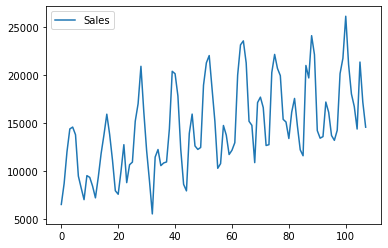

In [5]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

### Fit Prophet model <a class="anchor" id="CarDatasetFitProphetModel"></a>
[TOC](#TOC)

In [6]:
from pandas import to_datetime
from prophet import Prophet

# rename columns
# - this is a must!
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
p("Renaming the columns is a must:")
u.DisplayDataFrame(df.head())

# fit the model
model = Prophet()
model.fit(df)

Renaming the columns is a must:


,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


10:19:05 - cmdstanpy - INFO - Chain [1] start processing
10:19:05 - cmdstanpy - INFO - Chain [1] done processing


### In-sample Forecast <a class="anchor" id="CarDatasetInSampleForecast"></a>
[TOC](#TOC)

In [7]:
import pandas as pd

# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [8]:
forecast = model.predict(future) # dfrForecast

p("All columns of forecast dataframe:")
p(", ".join(list(forecast.columns)))
p()

# summarize the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

All columns of forecast dataframe:
ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat



,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14366.950441,12748.513915,15944.047110
1,1968-02-01,14931.417879,13257.673738,16531.126532
2,1968-03-01,20853.806412,19344.961213,22276.241699
3,1968-04-01,22896.047629,21320.523840,24404.304621
4,1968-05-01,24212.079305,22672.912144,25694.286290


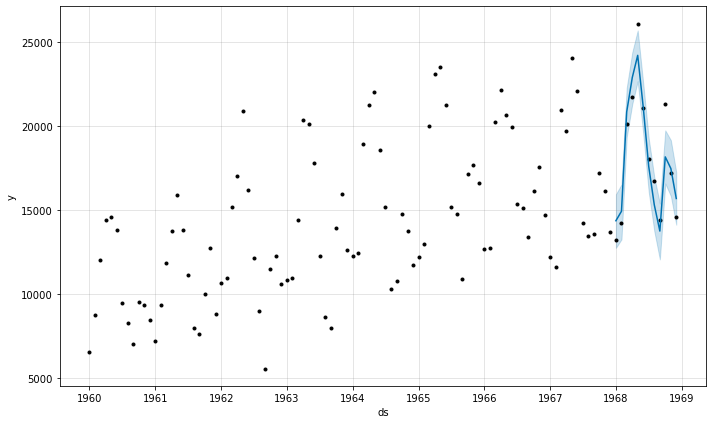

In [9]:
# plot forecast
model.plot(forecast)
pyplot.show()

__Conclusions__
* This In-sample forecast predicts the prediction range __quite well__.
* Data leakage:
    * Out-of-Sample Forecasts for Real Use Cases: In practice, the primary purpose of time series forecasting is to make predictions about future __data points__ that the model has __not seen__ during training. 
    * Therefore, the __primary focus should be on out-of-sample forecasts__, where the model's true predictive ability is tested.

### Out-of-sample forecast <a class="anchor" id="CarDatasetOutOfSampleForecast"></a>
[TOC](#TOC)

10:19:05 - cmdstanpy - INFO - Chain [1] start processing
10:19:05 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.503433  13876.178458  17123.898453
1 1969-02-01  16169.601828  14626.074509  17868.722486
2 1969-03-01  21375.275888  19811.395566  22914.771668
3 1969-04-01  23513.699386  22048.514237  25114.911853
4 1969-05-01  25030.879738  23491.971243  26706.831461


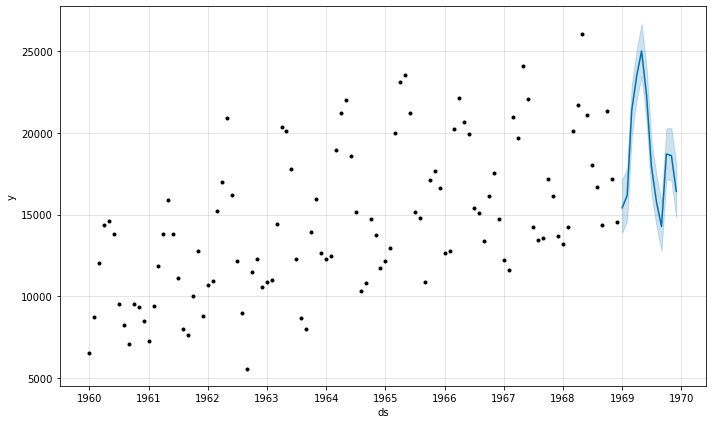

In [10]:
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

### Metric <a class="anchor" id="CarDatasetMetric"></a>
[TOC](#TOC)

10:19:06 - cmdstanpy - INFO - Chain [1] start processing


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


10:19:06 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1336.813


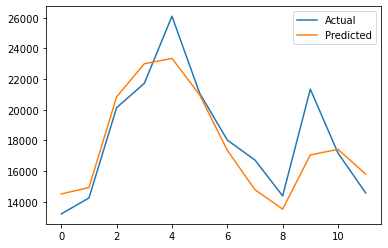

In [11]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

__Conclusions__
* Prophet detects the seasonal behavior easily:
    * Two yearly peaks (April and September) are nicely detected.
    * Also the height of the peaks is estimated properly.

## Microsoft dataset <a class="anchor" id="MicrosoftDataset"></a>
[TOC](#TOC)   

### Parametrized Prophet function <a class="anchor" id="CarDatasetParametrizedProphetFunction"></a>
[TOC](#TOC)   

In [66]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

def ParametrizedProphet(dfrSource, strTestStartDate, blnVerbose=False):
    '''
    This function wraps the standard Facebook/Meta Prophet function.
    
    Inspiration: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
    
    When       Who What
    2023 09 26 dh  Created
    '''

    # show-stoppers
    if not isinstance(dfrSource, pd.DataFrame):
        raise ValueError(f"Error in ParametrizedProphet(): dfrSource is not a DataFrame.")
    if len(dfrSource.columns) != 2:
        raise ValueError(f"Error in ParametrizedProphet(): dfrSource has {len(dfrSource.columns)} rather than 2 columns.")
    intTestStartDateLength =len(strTestStartDate) 
    if   intTestStartDateLength ==  4: strTimeSteps = "years"
    elif intTestStartDateLength ==  7: strTimeSteps = "months"
    elif intTestStartDateLength == 10: strTimeSteps = "days"
    else:
        raise ValueError(f"Error in ParametrizedProphet(): strTestStartDate ")

    # Prophet-specific constants
    cstrDateStampAbbreviation = "ds"
    cstrFunctionValueAbbreviation = "y"
    
    # prepare expected column names
    dfrSource.columns = [cstrDateStampAbbreviation, cstrFunctionValueAbbreviation]
    dfrSource[cstrDateStampAbbreviation]= to_datetime(dfrSource[cstrDateStampAbbreviation])
    
    # make sure the data is sorted
    dfrSource.sort_values(by=cstrDateStampAbbreviation, inplace=True, ascending=True)
    
    # define the period for which we want a prediction
    lstrFutureDates = list()
    if strTimeSteps in ["years","months","days"]:
        intCurrYear  = int(strTestStartDate[0:4])
        intLastYear = dfrSource.iloc[-1][cstrDateStampAbbreviation].year
    if strTimeSteps in ["months","days"]:
        intCurrMonth = int(strTestStartDate[5:7])
        intLastMonth = dfrSource.iloc[-1][cstrDateStampAbbreviation].month
    if strTimeSteps in ["days"]:
        intCurrDay = int(strTestStartDate[8:10])
        intLastDay = dfrSource.iloc[-1][cstrDateStampAbbreviation].month
    
    if strTimeSteps == "years": # yearly ----------------------------------
        while (intCurrYear) <= (intLastYear):
            strDate = f"{intCurrYear:04d}"
            lstrFutureDates.append(strDate)
            intCurrYear += 1
            
    if strTimeSteps == "months": # monthly ----------------------------------
        while (intCurrYear, intCurrMonth) <= (intLastYear, intLastMonth):
            strDate = f"{intCurrYear:04d}-{intCurrMonth:02d}"
            lstrFutureDates.append(strDate)

            # increment to the next month
            if intCurrMonth == 12:
                intCurrYear += 1
                intCurrMonth = 1
            else:
                intCurrMonth += 1
                
    if strTimeSteps == "days": # daily ----------------------------------
    
        while (intCurrYear, intCurrMonth, intCurrDay) <= (intLastYear, intLastMonth, intLastDay):
            strDate = f"{intCurrYear:04d}-{intCurrMonth:02d}-{intCurrDay:02d}"
            lstrFutureDates.append(strDate)

            # increment tonext day
            datCurrDate = datetime.strptime(strDate, '%Y-%m-%d')
            datNextDate = datCurrDate + timedelta(days=1)
            intCurrYear = datNextDate.year
            intCurrMonth = datNextDate.month
            intCurrDay = datNextDate.day     
    
    intTestLength = len(lstrFutureDates)  
    dfrFutureDates = DataFrame(lstrFutureDates)
    dfrFutureDates.columns = [cstrDateStampAbbreviation]
    dfrFutureDates[cstrDateStampAbbreviation] = to_datetime(dfrFutureDates[cstrDateStampAbbreviation])
    a1datFutureDates = dfrFutureDates[cstrDateStampAbbreviation].values    
    
    # create train dataset, remove test dataset
    dfrTrain = dfrSource.drop(dfrSource.index[-intTestLength:])
    if blnVerbose:
        p("End of training data".upper())
        u.DisplayDataFrame(dfrTrain.tail())
    
    # fit model
    objProphet = Prophet()
    objProphet.fit(dfrTrain)
    
    # warnings
    p("(If this text is preceded by two pink lines: just ignore them.)")   
    p()

    # forecast
    dfrForecast = objProphet.predict(dfrFutureDates)

    # MAE (mean absolute error)
    y_true = dfrSource[cstrFunctionValueAbbreviation][-intTestLength:].values # a1fltYTrue
    y_pred = dfrForecast['yhat'].values                            # a1fltYPredicted
    fltMAE = mean_absolute_error(y_true, y_pred)    

    # plot expected vs actual
    plt.plot(a1datFutureDates,y_true, label='True',color="green")
    plt.plot(a1datFutureDates,y_pred, label='Predicted',color="orange")
    plt.legend()
    plt.title(f'MAE = {round(fltMAE,3)}')
    plt.xticks(rotation='vertical')
    plt.show()

if False:    
    # test on demo data
    strSourcePath = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
    dfrCarDataSet = read_csv(strSourcePath, header=0)
    u.ShortDataFrameDisplay(dfrCarDataSet)
    ParametrizedProphet(dfrCarDataSet,strTestStartDate="1968-01",blnVerbose=False)    

DataFrame 'dfrMicrosoft':


,Date,Price
0,2020-01-01,153.010615
1,2020-01-02,154.205344
...,...,...
1343,2023-09-05,331.274994
1344,2023-09-06,333.130005


11:47:03 - cmdstanpy - INFO - Chain [1] start processing


FORECAST PERIOD: 1 1 WEEK


11:47:04 - cmdstanpy - INFO - Chain [1] done processing


(If this text is preceded by two pink lines: just ignore them.)



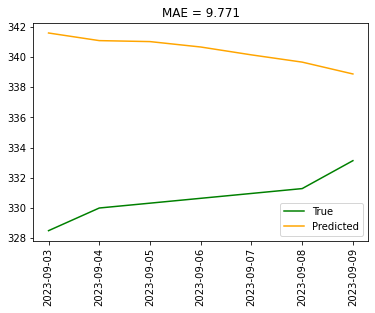

FORECAST PERIOD: 1 1 MONTH


11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing


(If this text is preceded by two pink lines: just ignore them.)



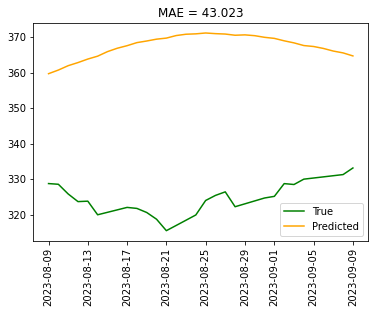

11:47:05 - cmdstanpy - INFO - Chain [1] start processing


FORECAST PERIOD: 1 1 YEAR


11:47:05 - cmdstanpy - INFO - Chain [1] done processing


(If this text is preceded by two pink lines: just ignore them.)



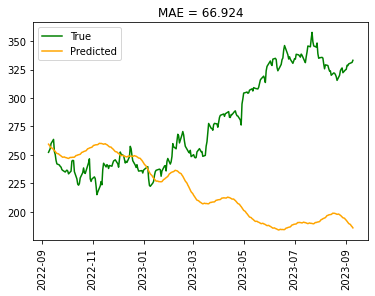

11:47:05 - cmdstanpy - INFO - Chain [1] start processing


FORECAST PERIOD: 1 2 YEARS


11:47:06 - cmdstanpy - INFO - Chain [1] done processing


(If this text is preceded by two pink lines: just ignore them.)



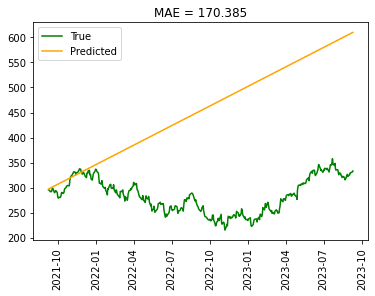

In [77]:
import pickle
import pandas as pd

# load Microsoft data
strFilename = f"../data/processed/dfrPredictionL2.p"
with open(strFilename, 'rb') as objBufferedWriter: # rb = read in binary mode
    dfrMicrosoft = pickle.load(objBufferedWriter)
dfrMicrosoft = dfrMicrosoft[["Date","Price"]]
u.ShortDataFrameDisplay(dfrMicrosoft)

# run Prophet forecasts
dstrForecastPeriods = {"1 week":"2023-09-03","1 month":"2023-08-09","1 year":"2022-09-09","2 years":"2021-09-09"}

for strPeriod, strStartDate in dstrForecastPeriods.items():
    p(f"Forecast period: 1 {strPeriod}".upper())
    ParametrizedProphet(dfrMicrosoft,strTestStartDate=strStartDate,blnVerbose=False)    

__Conclusions__
* Microsoft stock market prices seem to be difficult to forecast.
* The patterns of the forecasts vary a lot.
* Differently from ARIMA Prophet does not seem to focus on the last values of the training period.